# Support Vector Machine

This example refers to [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

SVM aims to find the maximum margin among of distributions which can do classification.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

Our goal is to classify below distributions.<br/>
We generate two distributions dataset with standard deviation=0.6

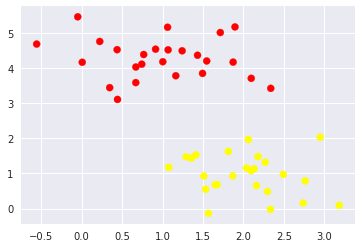

In [2]:
from sklearn.datasets.samples_generator import make_blobs
# random two distributions
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

You may wonder can apply linear discriminative classifier to handle this task, but it seems more than one possible dividing line that can perfectly resolve and it pretty hard to find a better solutions to face with new data.

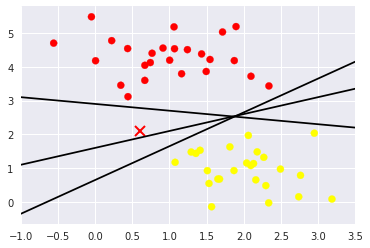

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# new dot
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# situation when m of linear function is (1, 0.5, -0.2)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

    plt.xlim(-1, 3.5)

Support Vector Machine provide one way to solve this which is "margin".<br/>
The margin means distance to classify different distributions, and then the maximum margin we get the better classification ability we have.

(-1, 3.5)

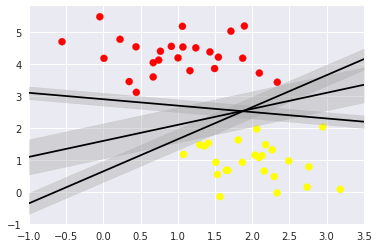

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Let use Scikit-learn's support vector machine classifier to train an SVM model on this data.

In [5]:
from sklearn.svm import SVC
# parameter for tuning margins
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

For reusable, let create a function to exhibit the results.

In [6]:
def plot_svc_decision(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='#AAAAAA', alpha=0.4)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

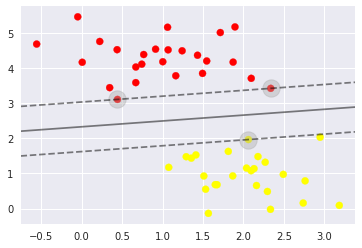

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)

Q: Why support vector machine is called as support vectors? <br/>
A: because the pivotal elements which located on boundary are known as the support vectors. In Scikit_Learn, we can enumerate these via `support_vectors_`

In [8]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

## Advanced

Furthermore, we can see differenct situation.

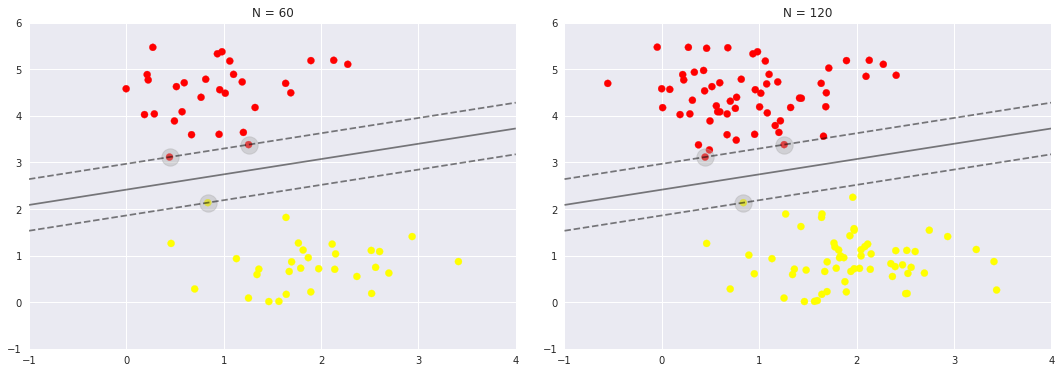

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, 
                      random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    

Let use IPython's interactive widgets to view this feature

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

A Jupyter Widget

<function __main__.plot_svm>

if we face to nonlinear data or higher-dimensional space, we have to use more complex so called kernel way to resolve. <br/>
Let see the results of applying linear SVM on nonlinear data.

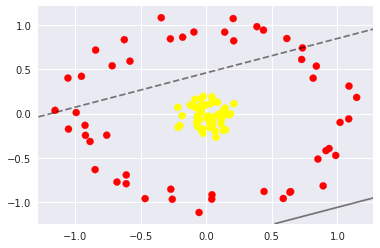

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf, plot_support=False)

Maybe we still can use linear way to try to resolve this by projecting these data into higher-dimensional such that a linear seperator would be sufficient.<br/><br/>
For example, one simple projective function we would be use is radial basis funciton centered on the middle clump.

In [12]:
r = np.exp(-(X ** 2).sum(1))

Let visualize this distribution using a three-dimensional plot

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[20, 45], azip=(-180, 180), X=fixed(X), y=fixed(y))

/home/jameschien/anaconda2/lib/python2.7/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


A Jupyter Widget

<function __main__.plot_3D>

A potential problem with this strategy, projecting N points into N dimensions, is that it might be very computationally intensive as N grows large.<br/>
However, because of a neat little procedure known as the kernel trick, a fit on kernel-transformed data can be done implicitly, that is, without ever building the full N-dimensional representation of the kernel projection! This kernel trick is built into the SVM.
* kernel: project two vectors into others dimension then calculate inner-products implicitly.

In Scikit-Learn can apply kernelized SVM simply by changing 
our linear kernel to an RBF(radial basis function) kernel.

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

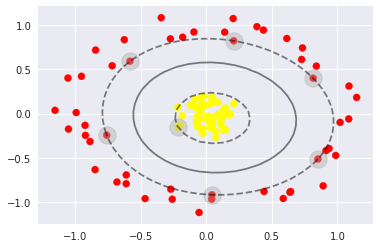

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=300, lw=1, facecolors='none')

## Tuning SVM

If our data has amount of overlap? Let's see

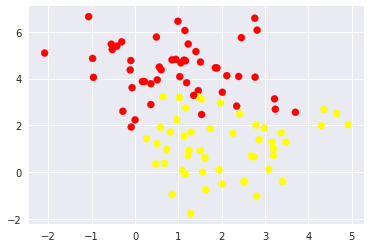

In [16]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Fortunately, we can use softens the margin: that is allows some of the points to creep into the margin if that allow a better fit.<br/>
But there is a problem which is if margin controlled by a tuning parameter C. For very large C the margin is hard, the smaller C which is softer can grow to encompass some points.

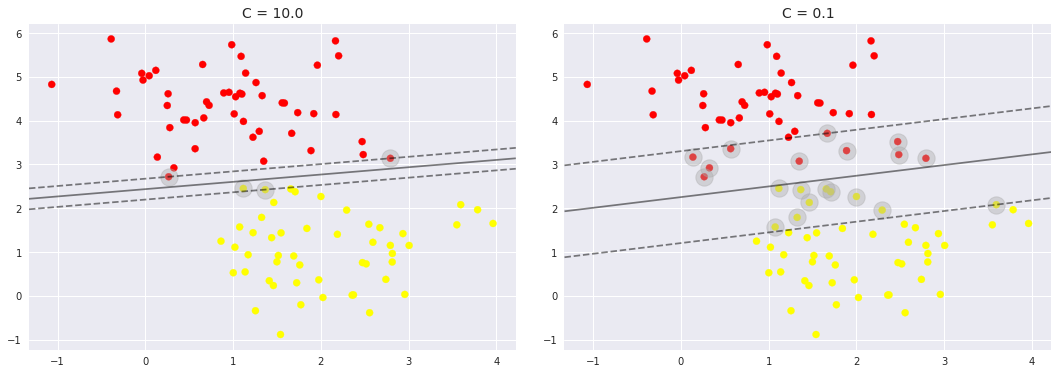

In [17]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of C parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure